In [ ]:
import os
import pycocotools
from pycocotools import mask
import pycocotools.mask as mask_util
import numpy as np
import json
from pycocotools.coco import COCO
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import matplotlib as mpl

def np_encoder(object):
    if isinstance(object, np.generic):
        return object.item()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# from config import BASE_PATH, CLASSES
BASE_PATH = '/content/drive/MyDrive/Desktop/4. Spring Course/1. Advances in Computer Vision/7. Project/gi-tract-image-segmentation'
CLASSES = ['small_bowel', 'large_bowel', 'stomach']

In [ ]:
import os
os.chdir(BASE_PATH)
!pwd

/content/drive/MyDrive/Desktop/4. Spring Course/1. Advances in Computer Vision/7. Project/gi-tract-image-segmentation


In [ ]:
# Unzip files into the On the Fly Dataset

import zipfile
import os

zip_path = '/content/drive/MyDrive/Desktop/4. Spring Course/1. Advances in Computer Vision/7. Project/gi-tract-image-segmentation/datasets_zip/uw-madison-gi-tract-image-segmentation.zip'
extract_path = '/content/datasets'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzipped successfully!")

Unzipped successfully!


In [ ]:
from src.data import SegmentationDataset

In [ ]:
sd = SegmentationDataset(dataset_dir='/content/datasets/train',
                         csv_file_path='/content/datasets/train.csv')

In [ ]:
sd.processed_df.head()

,id,class,segmentation,case,day,slice,file_path,file_name,composite_id,image_height,image_width,resolution
0,case123_day20_slice_0065,stomach,28094 3 28358 7 28623 9 28889 9 29155 9 29421 ...,123,20,0065,/content/datasets/train/case123/case123_day20/...,slice_0065_266_266_1.50_1.50.png,123_20_slice_0065_266_266_1.50_1.50.png,266,266,266x266
1,case123_day20_slice_0066,stomach,27561 8 27825 11 28090 13 28355 14 28620 15 28...,123,20,0066,/content/datasets/train/case123/case123_day20/...,slice_0066_266_266_1.50_1.50.png,123_20_slice_0066_266_266_1.50_1.50.png,266,266,266x266
2,case123_day20_slice_0067,stomach,15323 4 15587 8 15852 10 16117 11 16383 12 166...,123,20,0067,/content/datasets/train/case123/case123_day20/...,slice_0067_266_266_1.50_1.50.png,123_20_slice_0067_266_266_1.50_1.50.png,266,266,266x266
3,case123_day20_slice_0068,stomach,14792 5 15056 9 15321 11 15587 11 15852 13 161...,123,20,0068,/content/datasets/train/case123/case123_day20/...,slice_0068_266_266_1.50_1.50.png,123_20_slice_0068_266_266_1.50_1.50.png,266,266,266x266
4,case123_day20_slice_0069,stomach,14526 6 14789 12 15054 14 15319 16 15584 17 15...,123,20,0069,/content/datasets/train/case123/case123_day20/...,slice_0069_266_266_1.50_1.50.png,123_20_slice_0069_266_266_1.50_1.50.png,266,266,266x266


In [ ]:
df = sd.processed_df

In [ ]:
random.seed(42)

# train - 65, val - 15, test - 20

train_df, temp_df = train_test_split(df, test_size=0.35, random_state=42)
# Split the temporary dataset into validation and test sets
val_df, test_df = train_test_split(temp_df, test_size=0.5714, random_state=42)  # test_size ~ 57.14% of 35%


train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [ ]:
train_df

,id,class,segmentation,case,day,slice,file_path,file_name,composite_id,image_height,image_width,resolution
0,case129_day20_slice_0061,stomach,45163 7 45522 10 45882 11 46241 13 46601 14 46...,129,20,0061,/content/datasets/train/case129/case129_day20/...,slice_0061_360_310_1.50_1.50.png,129_20_slice_0061_360_310_1.50_1.50.png,360,310,360x310
1,case34_day16_slice_0048,large_bowel,26975 6 27242 4 27249 9 27517 18 27792 20 2806...,34,16,0048,/content/datasets/train/case34/case34_day16/sc...,slice_0048_276_276_1.63_1.63.png,34_16_slice_0048_276_276_1.63_1.63.png,276,276,276x276
2,case121_day0_slice_0060,large_bowel,18503 5 18768 9 19033 12 19298 15 19564 18 198...,121,0,0060,/content/datasets/train/case121/case121_day0/s...,slice_0060_266_266_1.50_1.50.png,121_0_slice_0060_266_266_1.50_1.50.png,266,266,266x266
3,case35_day18_slice_0064,large_bowel,25013 3 25278 16 25552 19 25827 21 26102 23 26...,35,18,0064,/content/datasets/train/case35/case35_day18/sc...,slice_0064_276_276_1.63_1.63.png,35_18_slice_0064_276_276_1.63_1.63.png,276,276,276x276
4,case142_day0_slice_0087,small_bowel,25703 7 25968 10 26234 12 26500 18 26766 22 27...,142,0,0087,/content/datasets/train/case142/case142_day0/s...,slice_0087_266_266_1.50_1.50.png,142_0_slice_0087_266_266_1.50_1.50.png,266,266,266x266
...,...,...,...,...,...,...,...,...,...,...,...,...
22038,case32_day17_slice_0099,large_bowel,11578 4 11585 10 11843 21 12109 21 12359 10 12...,32,17,0099,/content/datasets/train/case32/case32_day17/sc...,slice_0099_266_266_1.50_1.50.png,32_17_slice_0099_266_266_1.50_1.50.png,266,266,266x266
22039,case63_day22_slice_0089,large_bowel,25342 7 25607 9 25871 12 26136 13 26401 14 266...,63,22,0089,/content/datasets/train/case63/case63_day22/sc...,slice_0089_266_266_1.50_1.50.png,63_22_slice_0089_266_266_1.50_1.50.png,266,266,266x266
22040,case113_day12_slice_0061,stomach,30785 17 31143 22 31501 26 31860 29 32219 30 3...,113,12,0061,/content/datasets/train/case113/case113_day12/...,slice_0061_360_310_1.50_1.50.png,113_12_slice_0061_360_310_1.50_1.50.png,360,310,360x310
22041,case133_day25_slice_0088,small_bowel,30819 13 31166 30 31523 40 31881 50 32240 53 3...,133,25,0088,/content/datasets/train/case133/case133_day25/...,slice_0088_360_310_1.50_1.50.png,133_25_slice_0088_360_310_1.50_1.50.png,360,310,360x310


In [ ]:
train_df['class'].value_counts(normalize=True)

class
large_bowel    0.412603
small_bowel    0.330354
stomach        0.257043
Name: proportion, dtype: float64

In [ ]:
val_df['class'].value_counts(normalize=True)

class
large_bowel    0.415176
small_bowel    0.330057
stomach        0.254767
Name: proportion, dtype: float64

In [ ]:
test_df['class'].value_counts(normalize=True)

class
large_bowel    0.424296
small_bowel    0.330237
stomach        0.245467
Name: proportion, dtype: float64

### Testing the code for temporary dataframe with 20 samples

In [ ]:
temp_df = train_df.sample(8)
temp_df = temp_df.reset_index(drop=True)

In [ ]:
CLASSES = ['small_bowel', 'large_bowel', 'stomach']
categories = sd.create_coco_categories(CLASSES)
categories

[{'id': 0, 'name': 'small_bowel'},
 {'id': 1, 'name': 'large_bowel'},
 {'id': 2, 'name': 'stomach'}]

In [ ]:
temp_images = sd.create_coco_images(temp_df)
temp_images[0]

Processing images: 100%|██████████| 8/8 [00:00<00:00, 47527.52it/s]


{'id': 1,
 'file_name': 'case136/case136_day0/scans/slice_0101_266_266_1.50_1.50.png',
 'width': 266,
 'height': 266}

In [ ]:
temp_annotations = sd.create_annotations(temp_df, temp_images)
temp_annotations[0]

Generating annotations: 100%|██████████| 8/8 [00:00<00:00, 45.90it/s]


{'segmentation': {'counts': [49633,
   11,
   253,
   14,
   252,
   15,
   250,
   16,
   250,
   17,
   249,
   17,
   249,
   17,
   249,
   16,
   251,
   15,
   252,
   14,
   253,
   12,
   256,
   9,
   261,
   3,
   17922],
  'size': [266, 266]},
 'bbox': [186, 154, 13, 17],
 'area': 44880,
 'image_id': 1,
 'category_id': 1,
 'iscrowd': 0,
 'id': 0}

In [ ]:
len(temp_annotations)

20

In [ ]:
temp_json = {
    'categories': categories,
    'images': temp_images,
    'annotations': temp_annotations
}

with open('temp_json.json', 'w', encoding='utf-8') as f:
    json.dump(temp_json, f, ensure_ascii=True, indent=4, default=np_encoder)

In [ ]:
from pathlib import Path
annFile = Path(f'temp_json.json')
coco = COCO(annFile)
imgIds = coco.getImgIds()

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [ ]:
temp_images

[{'id': 1,
  'file_name': 'case136/case136_day0/scans/slice_0101_266_266_1.50_1.50.png',
  'width': 266,
  'height': 266},
 {'id': 2,
  'file_name': 'case147/case147_day14/scans/slice_0107_266_266_1.50_1.50.png',
  'width': 266,
  'height': 266},
 {'id': 3,
  'file_name': 'case66/case66_day0/scans/slice_0112_266_266_1.50_1.50.png',
  'width': 266,
  'height': 266},
 {'id': 4,
  'file_name': 'case88/case88_day36/scans/slice_0078_360_310_1.50_1.50.png',
  'width': 360,
  'height': 310},
 {'id': 5,
  'file_name': 'case16/case16_day0/scans/slice_0038_360_310_1.50_1.50.png',
  'width': 360,
  'height': 310},
 {'id': 6,
  'file_name': 'case32/case32_day18/scans/slice_0087_266_266_1.50_1.50.png',
  'width': 266,
  'height': 266},
 {'id': 7,
  'file_name': 'case74/case74_day18/scans/slice_0106_266_266_1.50_1.50.png',
  'width': 266,
  'height': 266},
 {'id': 8,
  'file_name': 'case101/case101_day22/scans/slice_0117_266_266_1.50_1.50.png',
  'width': 266,
  'height': 266}]

In [ ]:
imgIds[5:7]

[6, 7]

In [ ]:
imgs = coco.loadImgs(imgIds[5:7])
imgs

[{'id': 6,
  'file_name': 'case32/case32_day18/scans/slice_0087_266_266_1.50_1.50.png',
  'width': 266,
  'height': 266},
 {'id': 7,
  'file_name': 'case74/case74_day18/scans/slice_0106_266_266_1.50_1.50.png',
  'width': 266,
  'height': 266}]

In [ ]:
imgs[0]

{'id': 6,
 'file_name': 'case32/case32_day18/scans/slice_0087_266_266_1.50_1.50.png',
 'width': 266,
 'height': 266}

In [ ]:
annIds = coco.getAnnIds(imgIds=[imgs[0]['id']])
annIds

[13]

In [ ]:
anns = coco.loadAnns(annIds[0])
anns

[{'segmentation': {'counts': [34382,
    11,
    253,
    15,
    251,
    17,
    248,
    20,
    246,
    22,
    244,
    23,
    38,
    5,
    200,
    24,
    33,
    9,
    200,
    25,
    29,
    12,
    199,
    27,
    27,
    14,
    198,
    28,
    25,
    15,
    198,
    29,
    24,
    16,
    198,
    28,
    23,
    17,
    198,
    29,
    21,
    19,
    198,
    29,
    20,
    20,
    197,
    30,
    18,
    23,
    195,
    31,
    17,
    24,
    195,
    32,
    14,
    28,
    193,
    32,
    12,
    31,
    191,
    33,
    11,
    34,
    189,
    34,
    8,
    36,
    188,
    37,
    3,
    39,
    188,
    79,
    187,
    80,
    186,
    81,
    185,
    81,
    186,
    81,
    185,
    82,
    185,
    81,
    186,
    81,
    185,
    81,
    186,
    80,
    186,
    80,
    187,
    79,
    188,
    78,
    188,
    78,
    189,
    77,
    189,
    77,
    190,
    76,
    192,
    73,
    194,
    72,
    194,
    71,
    196,
    70,
    19

In [ ]:
dataset_dir = '/datasets/train'

[6, 7]
6
[13]
7
[14]


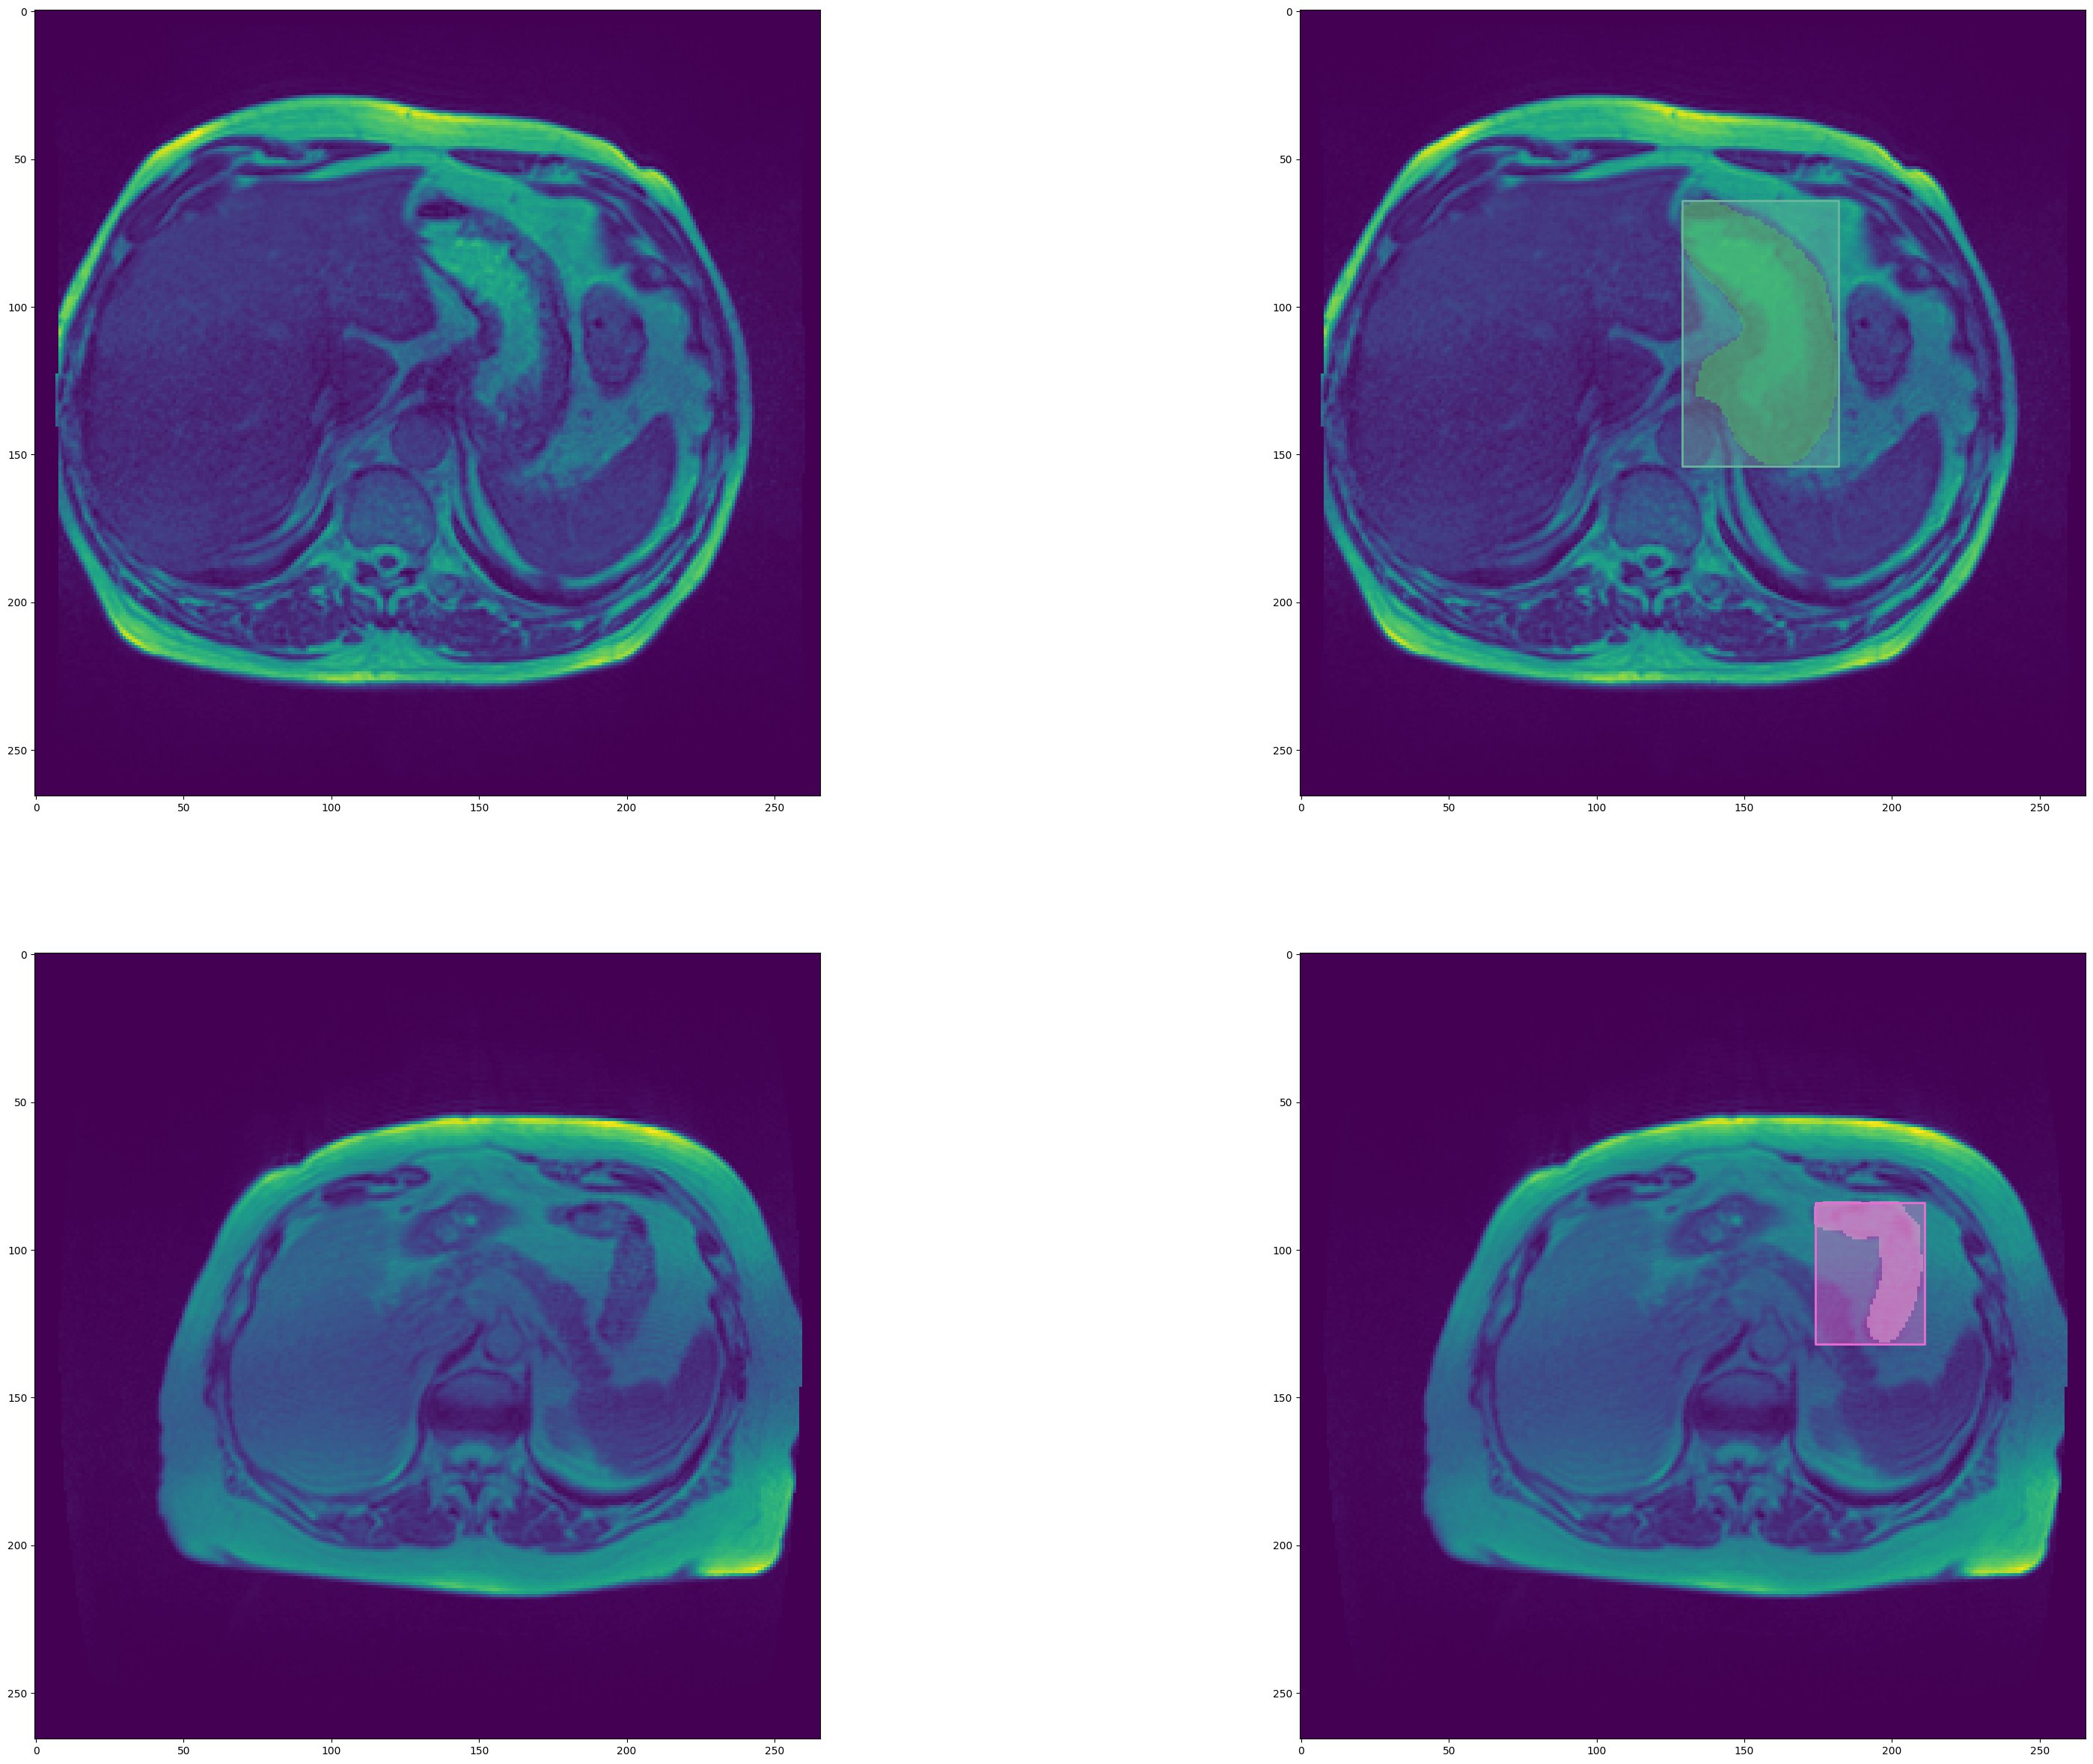

In [ ]:
from matplotlib import pyplot as plt
from PIL import Image
imgs = coco.loadImgs(imgIds[5:7])
print(imgIds[5:7])
_, axs = plt.subplots(len(imgs), 2, figsize=(40, 15 * len(imgs)))
for img, ax in zip(imgs, axs):
    print(img['id'])
    I = Image.fromarray(
        np.array(Image.open(os.path.join(dataset_dir, img['file_name']))).astype("uint16"))
    annIds = coco.getAnnIds(imgIds=[img['id']])
    print(annIds)
    anns = coco.loadAnns(annIds)
    ax[0].imshow(I)
    ax[1].imshow(I)
    plt.sca(ax[1])
    coco.showAnns(anns, draw_bbox=True)

In [ ]:
from src.data import DataGenerator

In [ ]:
temp_generator_class = DataGenerator(dataset_dir='/content/datasets/train',
                                     subset="train",
                                     classes=CLASSES,
                                     input_image_size=(128,128),
                                     annFile='temp_json.json',
                                     shuffle=True)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [ ]:
X, y = temp_generator_class.__getitem__(1)

In [ ]:
X.shape, y.shape

((128, 128, 3), (128, 128, 3))

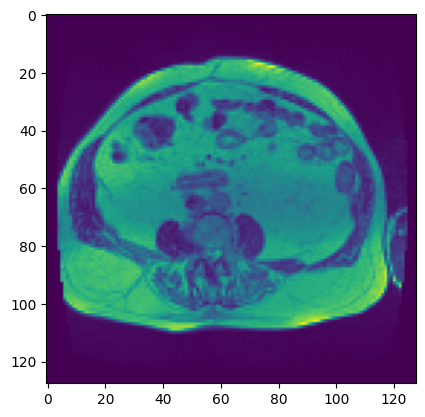

In [ ]:
plt.imshow(X[:,:,0])

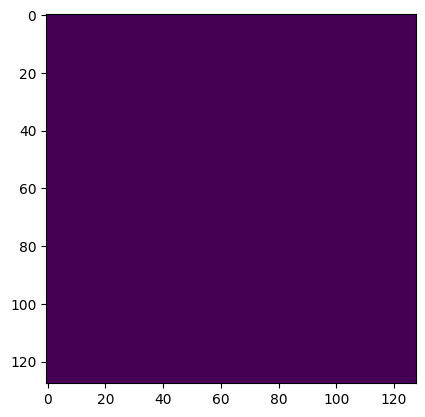

In [ ]:
plt.imshow(y[:,:,2]/255.)

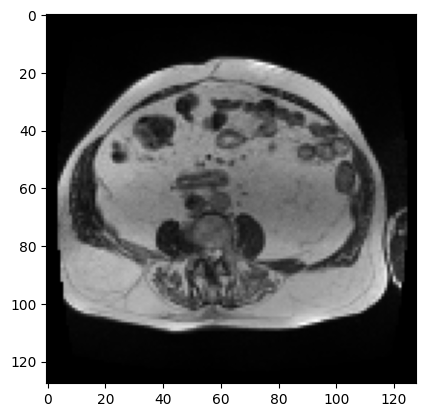

In [ ]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['none', 'red'])  # 'none' is transparent, 'red' for the mask

fig, ax = plt.subplots()
# Display the image
ax.imshow((X/255.)[:,:,0], cmap='gray')  # Use gray scale for the background image
# Display the mask
# The mask is added with 'alpha' for transparency so the image can be seen under the mask
ax.imshow(y[:,:,2], cmap=cmap, alpha=0.5)  # Adjust alpha for more or less transparency

plt.show()

In [ ]:
from torch.utils.data import DataLoader

temp_loader = DataLoader(temp_generator_class, batch_size=32, num_workers=0)

In [ ]:
print("Batch size:", temp_loader.batch_size)
print("Num workers:", temp_loader.num_workers)
print("Dataset size:", len(temp_loader.dataset))
print("Number of batches:", len(temp_loader))

Batch size: 32
Num workers: 0
Dataset size: 8
Number of batches: 1


In [ ]:
# for images, labels in temp_loader:
#     # Execute your training or evaluation process
#     print(images)
#     pass

### Testing successful, proceeding to a train and test dataframes

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Desktop/4. Spring Course/1. Advances in Computer Vision/7. Project/gi-tract-image-segmentation'

In [ ]:
CLASSES = ['small_bowel', 'large_bowel', 'stomach']

In [ ]:
# !mkdir datasets/coco

In [ ]:
# CLASSES = ['small_bowel', 'large_bowel', 'stomach']
# categories = sd.create_coco_categories(CLASSES)
# train_images = sd.create_coco_images(train_df)
# train_annotations = sd.create_annotations(train_df, train_images)

# train_json = {
#     'categories': categories,
#     'images': train_images,
#     'annotations': train_annotations
# }

# with open('/content/datasets/coco/train_json.json', 'w', encoding='utf-8') as f:
#     json.dump(train_json, f, ensure_ascii=True, indent=4, default=np_encoder)

# print(train_annotations[0])

In [ ]:
# CLASSES = ['small_bowel', 'large_bowel', 'stomach']
# categories = sd.create_coco_categories(CLASSES)
# val_images = sd.create_coco_images(val_df)
# val_annotations = sd.create_annotations(val_df, val_images)

# val_json = {
#     'categories': categories,
#     'images': val_images,
#     'annotations': val_annotations
# }

# with open('/content/datasets/coco/val_json.json', 'w', encoding='utf-8') as f:
#     json.dump(val_json, f, ensure_ascii=True, indent=4, default=np_encoder)

# print(val_annotations[0])

In [ ]:
# test_images = sd.create_coco_images(test_df)
# test_annotations = sd.create_annotations(test_df, test_images)
# test_json = {
#     'categories': categories,
#     'images': test_images,
#     'annotations': test_annotations
# }

# with open('/content/datasets/coco/test_json.json', 'w', encoding='utf-8') as f:
#     json.dump(test_json, f, ensure_ascii=True, indent=4, default=np_encoder)

# print(test_annotations[0])

In [ ]:
train_df.shape, val_df.shape, test_df.shape

((22043, 12), (5087, 12), (6783, 12))

In [ ]:
from src.data import DataGenerator

In [ ]:
train_generator_class = DataGenerator(dataset_dir='/content/datasets/train',
                                     subset="train",
                                     classes=CLASSES,
                                     input_image_size=(128,128),
                                     annFile='/content/datasets/coco/train_json.json',
                                     shuffle=True)

val_generator_class = DataGenerator(dataset_dir='/content/datasets/train',
                                     subset="train",
                                     classes=CLASSES,
                                     input_image_size=(128,128),
                                     annFile='/content/datasets/coco/val_json.json',
                                     shuffle=True)

test_generator_class = DataGenerator(dataset_dir='/content/datasets/train',
                                     subset="test",
                                     classes=CLASSES,
                                     input_image_size=(128,128),
                                     annFile='/content/datasets/coco/test_json.json',
                                     shuffle=False)

loading annotations into memory...
Done (t=2.79s)
creating index...
index created!
loading annotations into memory...
Done (t=1.38s)
creating index...
index created!
loading annotations into memory...
Done (t=1.32s)
creating index...
index created!


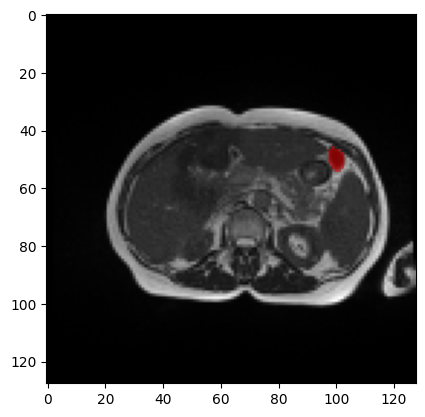

In [ ]:
from matplotlib.colors import ListedColormap

X, y = train_generator_class.__getitem__(9)

cmap = ListedColormap(['none', 'red'])  # 'none' is transparent, 'red' for the mask

fig, ax = plt.subplots()
# Display the image
ax.imshow((X/255.)[:,:,0], cmap='gray')  # Use gray scale for the background image
# Display the mask
# The mask is added with 'alpha' for transparency so the image can be seen under the mask
ax.imshow(y[:,:,1], cmap=cmap, alpha=0.5)  # Adjust alpha for more or less transparency

plt.show()

In [ ]:
from torch.utils.data import DataLoader


train_loader = DataLoader(train_generator_class, batch_size=32, num_workers=0)
val_loader = DataLoader(val_generator_class, batch_size=32, num_workers=0)
test_loader = DataLoader(test_generator_class, batch_size=32, num_workers=0)

In [ ]:
print("Batch size:", train_loader.batch_size)
print("Num workers:", train_loader.num_workers)
print("Dataset size:", len(train_loader.dataset))
print("Number of batches:", len(train_loader))

Batch size: 32
Num workers: 0
Dataset size: 14269
Number of batches: 446


In [ ]:
print("Batch size:", val_loader.batch_size)
print("Num workers:", val_loader.num_workers)
print("Dataset size:", len(val_loader.dataset))
print("Number of batches:", len(val_loader))

Batch size: 32
Num workers: 0
Dataset size: 4620
Number of batches: 145


In [ ]:
!pip install segmentation_models_pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 57.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_6

In [ ]:
import segmentation_models_pytorch as smp

# Define model
model = smp.Unet(
    encoder_name="efficientnet-b7",
    encoder_weights="imagenet",
    in_channels=3,
    classes=3,
    activation='sigmoid'
)

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b7-dcc49843.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b7-dcc49843.pth
100%|██████████| 254M/254M [00:01<00:00, 234MB/s]


In [ ]:
model

Unet(
  (encoder): EfficientNetEncoder(
    (_conv_stem): Conv2dStaticSamePadding(
      3, 64, kernel_size=(3, 3), stride=(2, 2), bias=False
      (static_padding): ZeroPad2d((0, 1, 0, 1))
    )
    (_bn0): BatchNorm2d(64, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (_blocks): ModuleList(
      (0): MBConvBlock(
        (_depthwise_conv): Conv2dStaticSamePadding(
          64, 64, kernel_size=(3, 3), stride=[1, 1], groups=64, bias=False
          (static_padding): ZeroPad2d((1, 1, 1, 1))
        )
        (_bn1): BatchNorm2d(64, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
        (_se_reduce): Conv2dStaticSamePadding(
          64, 16, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_se_expand): Conv2dStaticSamePadding(
          16, 64, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_project_conv): Conv2dStaticSamePaddi

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Dice Loss
class DiceLoss(nn.Module):
    def __init__(self, smooth=1):
        super(DiceLoss, self).__init__()
        self.smooth = smooth

    def forward(self, y_pred, y_true):
        y_pred = y_pred.contiguous().view(-1)
        y_true = y_true.contiguous().view(-1)
        intersection = (y_pred * y_true).sum()
        dice = (2. * intersection + self.smooth) / (y_pred.sum() + y_true.sum() + self.smooth)
        return 1 - dice

# Combined BCE and Dice Loss
class BCEDiceLoss(nn.Module):
    def __init__(self, smooth=1):
        super(BCEDiceLoss, self).__init__()
        self.bce = nn.BCEWithLogitsLoss()
        self.dice = DiceLoss(smooth)

    def forward(self, y_pred, y_true):
        bce_loss = self.bce(y_pred, y_true)
        dice_loss = self.dice(y_pred, y_true)
        return 0.5 * bce_loss + 0.5 * dice_loss

def dice_coef_func(y_true, y_pred, smooth=1):
    y_true_f = y_true.contiguous().view(-1)
    y_pred_f = y_pred.contiguous().view(-1)
    intersection = torch.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (torch.sum(y_true_f) + torch.sum(y_pred_f) + smooth)


In [ ]:
import torch
# from src.loss import BCEDiceLoss, dice_coef

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.2, patience=5, verbose=True, min_lr=0.001)
criterion = BCEDiceLoss()

In [ ]:
from tqdm import tqdm
train_losses = []
val_losses = []
train_dice_coefs = []
val_dice_coefs = []
epochs = 5

class AverageMeter(object):
    """Computes and stores the average and current value"""

    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


for epoch in range(epochs):
    model.train()
    train_loss = 0
    dice_coef = 0

    dice_coef_meter = AverageMeter()
    batches = tqdm(enumerate(train_loader), total=len(train_loader))
    batches.set_description("Epoch NA: Loss (NA) Accuracy (NA %)")
    for batch_idx, (data, target) in batches:
        data = data.permute(0, 3, 1, 2)
        target = target.permute(0, 3, 1, 2)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        dice_coef = dice_coef_func(output, target)
        dice_coef_meter.update(dice_coef)

    train_losses.append(train_loss / len(train_loader))
    train_dice_coefs.append(dice_coef / len(train_loader))
    batches.set_description(
            "Epoch {:d}: Loss ({:.2e}), Train Accuracy ({:02.0f}%)".format(
                epoch, train_loss, 100.0 * dice_coef_meter.avg
            )
        )


    model.eval()

    with torch.no_grad():
        val_loss = 0
        for data, target in tqdm(val_loader):
            data = data.permute(0, 3, 1, 2)
            target = target.permute(0, 3, 1, 2)

            output = model(data)
            loss = criterion(output, target)
            val_loss += loss.item()
            dice_coef += dice_coef_func(output, target)

    val_losses.append(val_loss / len(val_loader))
    val_dice_coefs.append(dice_coef / len(val_loader))

    print(f"Epoch {epoch}, Val Loss: {val_loss}")

    scheduler.step(val_loss)

    # Save model checkpoint
    torch.save(model.state_dict(), f'UNET_model_epoch_{epoch}.pth')


Epoch NA: Loss (NA) Accuracy (NA %):   0%|          | 1/446 [04:50<35:54:38, 290.51s/it]

In [ ]:
train_dice_coefs

In [ ]:
val_dice_coefs

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# # Plot training and validation dice coefficient
# plt.figure(figsize=(10, 5))
# plt.plot(train_dice_coefs, label='Train Dice Coefficient')
# plt.plot(val_dice_coefs, label='Validation Dice Coefficient')
# plt.title('Model Dice Coefficient')
# plt.ylabel('Dice Coefficient')
# plt.xlabel('Epoch')
# plt.legend(loc='upper left')
# plt.show()

In [ ]:
ls

In [ ]:
os.getcwd()

In [ ]:
model

In [ ]:
test_generator_class = DataGenerator(dataset_dir='/content/datasets/train',
                                     subset="train",
                                     classes=CLASSES,
                                     input_image_size=(128,128),
                                     annFile='/content/datasets/coco/test_json.json',
                                     shuffle=False)
# img_s, mask_s = test_generator_class.__getitem__(87)
test_loader = DataLoader(test_generator_class, batch_size=32, num_workers=0)

In [ ]:
from matplotlib.colors import ListedColormap

X, y = test_generator_class.__getitem__(9)

cmap = ListedColormap(['none', 'red'])  # 'none' is transparent, 'red' for the mask

fig, ax = plt.subplots()
# Display the image
ax.imshow((X/255.)[:,:,0], cmap='gray')  # Use gray scale for the background image
# Display the mask
# The mask is added with 'alpha' for transparency so the image can be seen under the mask
ax.imshow(y[:,:,1], cmap=cmap, alpha=0.5)  # Adjust alpha for more or less transparency

plt.show()

In [ ]:
images_test = []
predictions = []
masks = []
# No need to track gradients here
with torch.no_grad():
    for data in test_loader:
        # Assuming your DataLoader returns a tuple of (images, labels)
        images = data[0]
        images = images.permute(0, 3, 1, 2)
        images_test.append(images)
        print(images.shape)
        # Generate predictions
        output = model(images).permute(0, 2, 3, 1)
        predictions.append(output)
        masks.append(data[1])

In [ ]:
img_s = images_test[0].permute(0, 2, 3, 1)
pred_s = predictions[0]
mask_s = masks[0]

In [ ]:
mask_s.shape

In [ ]:
pred_s[0]

In [ ]:
pre = pred_s[0]
predict1 = (pre > 0.8).float()
plt.imshow(predict1)
predict2=pre[:,:,1]
predict3=pre[:,:,2]
plt.imshow(np.ma.masked_where(predict1== False,  predict1),cmap=cmap1, alpha=1)
plt.show()
plt.imshow(np.ma.masked_where(predict2== False,  predict2),cmap=cmap2, alpha=1)
plt.show()

plt.imshow(np.ma.masked_where(predict3== False,  predict3),cmap=cmap3, alpha=1)
plt.show()


In [ ]:
from matplotlib.colors import ListedColormap

X, y = img_s[0], mask_s[0]

cmap = ListedColormap(['none', 'red'])  # 'none' is transparent, 'red' for the mask

fig, ax = plt.subplots()
# Display the image
ax.imshow((X/255.)[:,:,0], cmap='gray')  # Use gray scale for the background image
# Display the mask
# The mask is added with 'alpha' for transparency so the image can be seen under the mask
ax.imshow(mask_s[0][:,:,0], cmap=cmap, alpha=0.5)  # Adjust alpha for more or less transparency

# ax.imshow(pred_s[0][:,:,2], cmap=cmap, alpha=0.5)  # Adjust alpha for more or less transparency

plt.show()

In [ ]:
img_s.shape, mask_s.shape, pred_s.shape

In [ ]:
img_s = img_s.permute(0, 2, 3, 1)
img_s.shape

In [ ]:
len(img_s)

In [ ]:
plt.imshow(np.ma.masked_where(predict1== False,  predict1),cmap=cmap1, alpha=1)

In [ ]:
fig = plt.figure(figsize=(10, 25))

gs = gridspec.GridSpec(nrows=len(img_s), ncols=3)
colors = ['yellow','green','red']
labels = [ "Small Bowel","Large Bowel", "Stomach"]
patches = [ mpatches.Patch(color=colors[i], label=f"{labels[i]}") for i in range(len(labels))]

cmap1 = mpl.colors.ListedColormap(colors[0])
cmap2 = mpl.colors.ListedColormap(colors[1])
cmap3= mpl.colors.ListedColormap(colors[2])
flag=False
for i in range(0,7):
    images, mask = img_s[i], mask_s[i]
    sample_img=images/255.
    mask1=mask[:,:,0]
    mask2=mask[:,:,1]
    mask3=mask[:,:,2]

    pre = pred_s[i]
    predict1=pre[:,:,0]
    predict1 = (predict1 > 0.8).float()  # Convert boolean tensor to float32
    predict1 = predict1.numpy()
    # predict1= (predict1 > 0.8).astype(np.float32)
    # predict1 = np.array(predict1)
    predict2=pre[:,:,1]
    predict3=pre[:,:,2]

    ax0 = fig.add_subplot(gs[i, 0])
    im = ax0.imshow(sample_img[:,:,0], cmap='gray')

    ax1 = fig.add_subplot(gs[i, 1])
    ax2 = fig.add_subplot(gs[i, 2])
    if(flag == False):
      flag= True
      ax0.set_title("Image", fontsize=15, weight='bold', y=1.02)
      ax1.set_title("Mask", fontsize=15, weight='bold', y=1.02)
      ax2.set_title("predicted Mask", fontsize=15, weight='bold', y=1.02)
      plt.legend(handles=patches, bbox_to_anchor=(1.1, 0.65), loc=2, borderaxespad=0.4,fontsize = 14,title='Mask Labels', title_fontsize=14, edgecolor="black",  facecolor='#c5c6c7')

    l0 = ax1.imshow(sample_img[:,:,0], cmap='gray')
    l1 = ax1.imshow(np.ma.masked_where(mask1== False,  mask1),cmap=cmap1, alpha=1)
    l2 = ax1.imshow(np.ma.masked_where(mask2== False,  mask2),cmap=cmap2, alpha=1)
    l3 = ax1.imshow(np.ma.masked_where(mask3== False,  mask3),cmap=cmap3, alpha=1)

    l0 = ax2.imshow(sample_img[:,:,0], cmap='gray')
    l1 = ax2.imshow(np.ma.masked_where(predict1== False,  predict1),cmap=cmap1, alpha=1)
    l2 = ax2.imshow(np.ma.masked_where(predict2== False,  predict2),cmap=cmap2, alpha=1)
    l3 = ax2.imshow(np.ma.masked_where(predict3== False,  predict3),cmap=cmap3, alpha=1)
    _ = [ax.set_axis_off() for ax in [ax0,ax1]]

    colors = [im.cmap(im.norm(1)) for im in [l1,l2, l3]]


In [ ]:
model.eval()

# Perform the prediction
with torch.no_grad():  # Turn off gradients to speed up this part
    preds = model(X)

In [ ]:
img_s = torch.from_numpy(img_s).float()

# Add a batch dimension if not already present
if len(img_s.shape) == 3:
    img_s = img_s.unsqueeze(0)  # Add the batch dimension at the first position

# Assuming the model was trained on GPU, we need to send the input to the GPU
if torch.cuda.is_available():
    img_s = img_s.to('cuda')
    model.to('cuda')

# Ensure the model is in evaluation mode
model.eval()

# Perform the prediction
with torch.no_grad():  # Turn off gradients to speed up this part
    preds = model(img_s)

# Optionally, move predictions back to CPU for further processing
preds = preds.cpu()

# Convert predictions to numpy array if needed, or continue with torch tensors
preds_numpy = preds.numpy()

In [ ]:
img_s, mask_s = test_generator_class.__getitem__(87)
preds = model.predict(img_s)